<a href="https://colab.research.google.com/github/aliaa2001/BigMart-Data-Analysis-and-Prediction/blob/main/Internship_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# problem statment
# The data has missing values as some stores do not report all the data due to technical glitches.
# Hypothesis generation
# Item weight
# Items fat content
# Item_Visibility
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import files
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
upload=files.upload()
upload=files.upload()



Saving Train.csv to Train.csv


Saving Test.csv to Test.csv


In [ ]:
ml_train = pd.read_csv("Train.csv")
ml_test = pd.read_csv("Test.csv")
ml_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
ml_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
print('Train Data',ml_train.shape)
print('Test Data',ml_test.shape)

Train Data (8523, 12)
Test Data (5681, 11)


In [ ]:
ml_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Axes: >

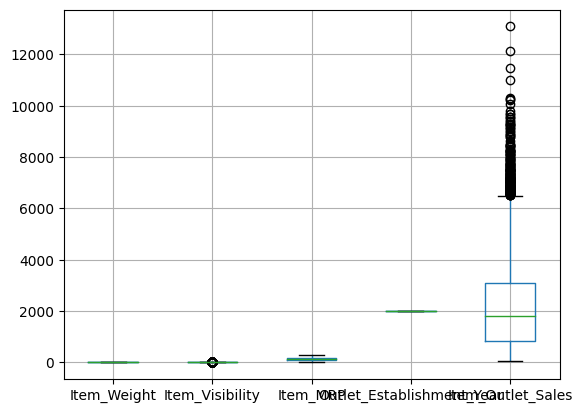

In [ ]:
ml_train.boxplot()

In [ ]:
print('Number of trainings examples:', len(ml_train),'\n')
ml_train.describe().T.style.background_gradient(cmap='RdPu')

Number of trainings examples: 8523 



,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.000000,12.857645,4.643456,4.555000,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.000000,0.066132,0.051598,0.000000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.000000,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.000000,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.000000,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [ ]:
# List of numerical features:
numerical = ml_train.select_dtypes(include = ['int64', 'Int64','float64']).dtypes.index
numerical

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
cat_features = ml_train.select_dtypes(include = ['object']).dtypes.index
cat_features

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

df['Item_Fat_Content'] = df['Item_Fat_Content'].astype('category')
df['Item_Fat_Content'] = df['Item_Fat_Content'].cat.codes
def UVA_Categorical(data, cat):
  plot.figure(figsize = (10,6))
  sns.countplot( cat)
  sns.countplot(data = data )
  plot.xlabel(cat,fontsize = 14, fontweight = 'bold')
  plot.ylabel('Count',fontsize = 14, fontweight = 'bold')
  plot.title('Value counts: \n{}'.format(ml_train[cat].value_counts(normalize = True)))

  # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plot.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)
  plot.show()


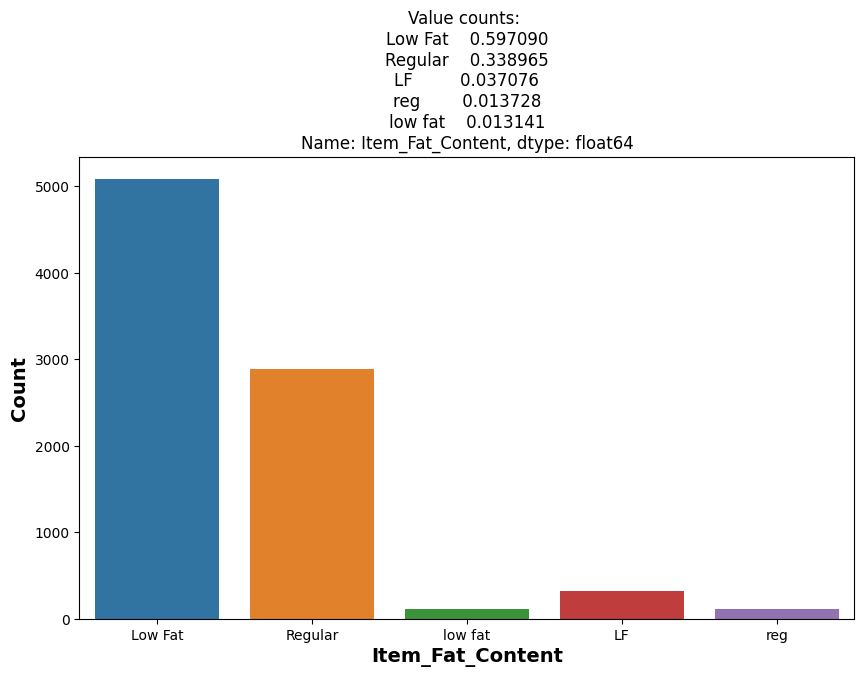

In [ ]:

def UVA_Categorical(data, cat):
  plot.figure(figsize=(10, 6))
  sns.countplot(x=cat,data=data)
  plot.xlabel(cat, fontsize=14, fontweight='bold')
  plot.ylabel('Count', fontsize=14, fontweight='bold')
  plot.title('Value counts: \n{}'.format(ml_train[cat].value_counts(normalize = True)))


  # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plot.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)
  plot.show()
UVA_Categorical(ml_train,'Item_Fat_Content')


In [ ]:
total_low_fat = 0.597090 + 0.037076 + 0.013141
total_low_fat

0.647307

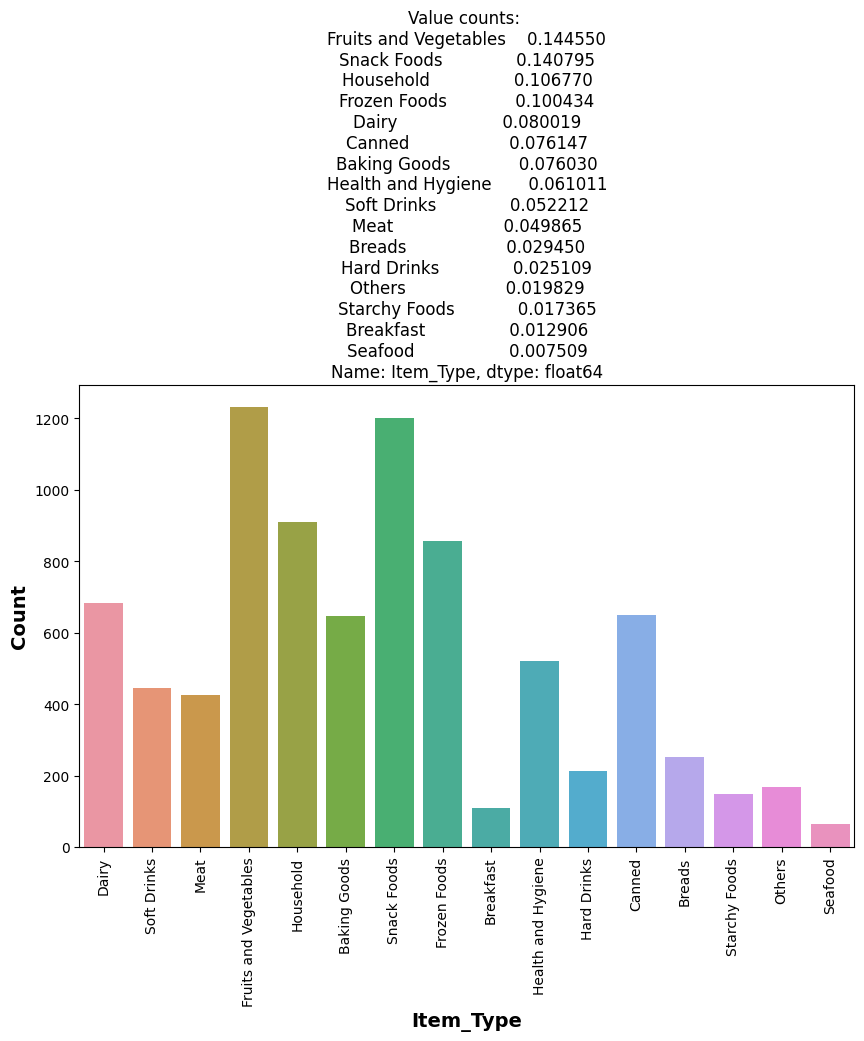

In [ ]:
UVA_Categorical(ml_train, 'Item_Type')

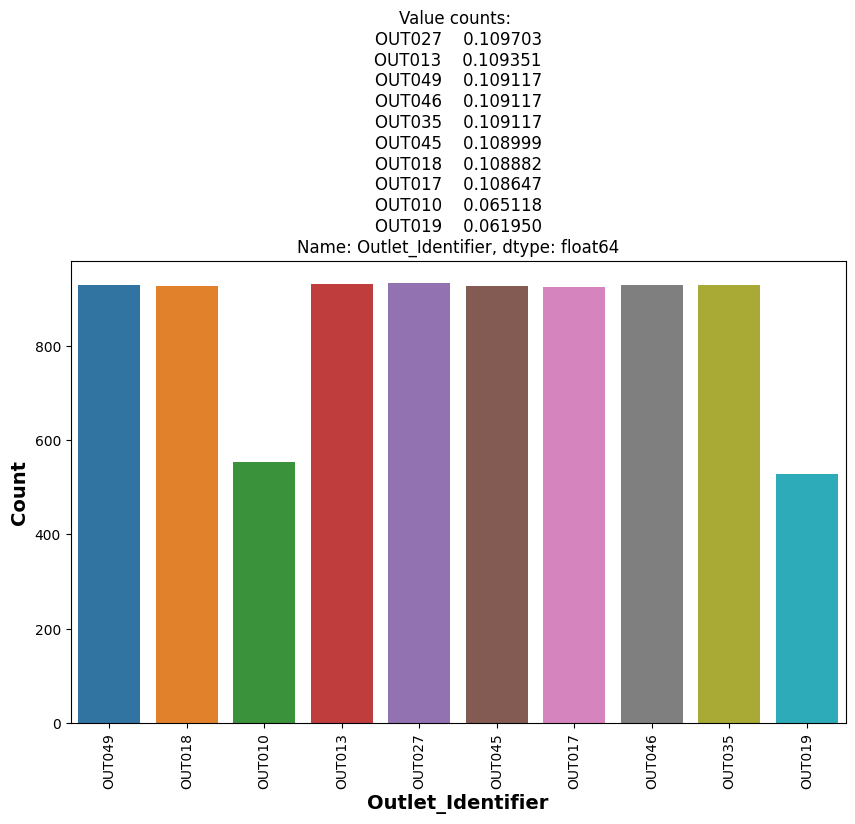

In [ ]:
UVA_Categorical(ml_train, 'Outlet_Identifier')

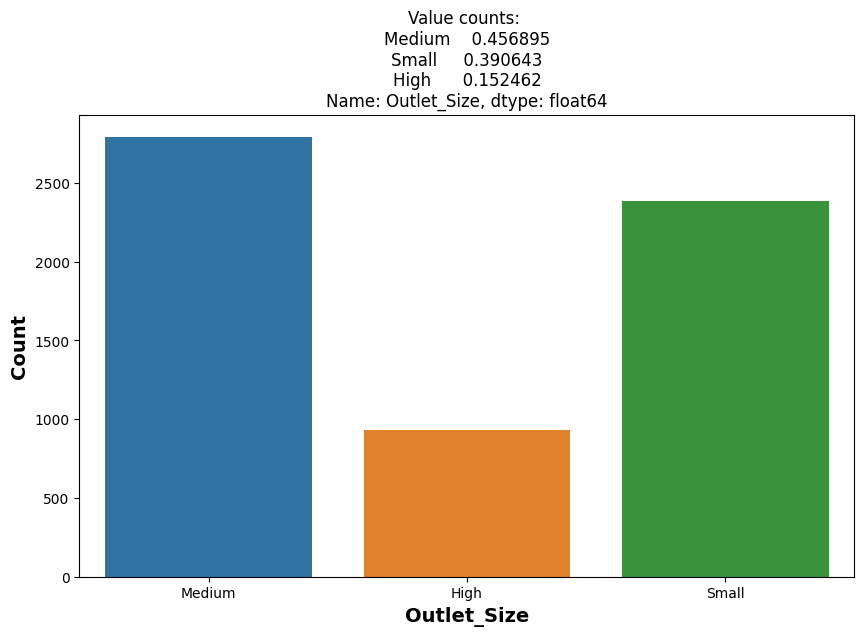

In [ ]:
UVA_Categorical(ml_train,'Outlet_Size')

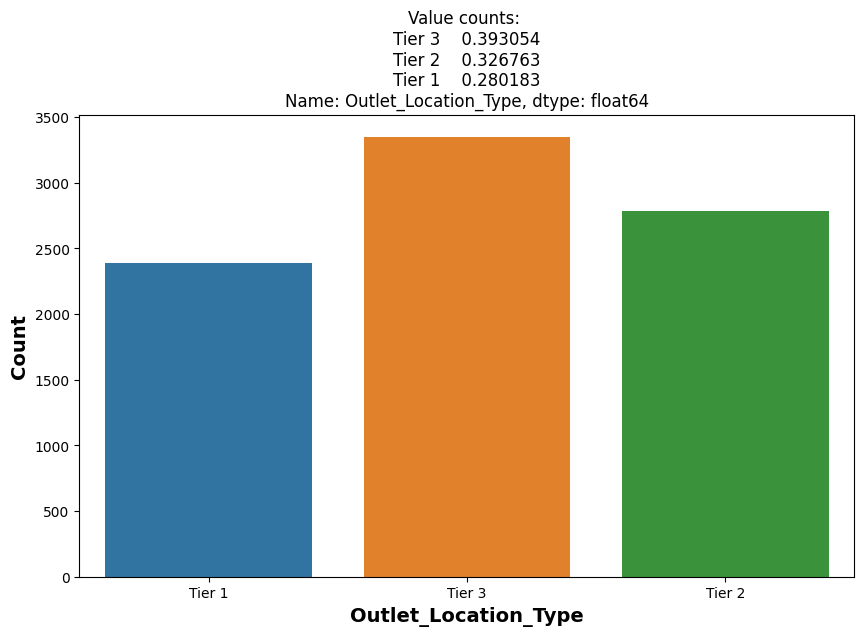

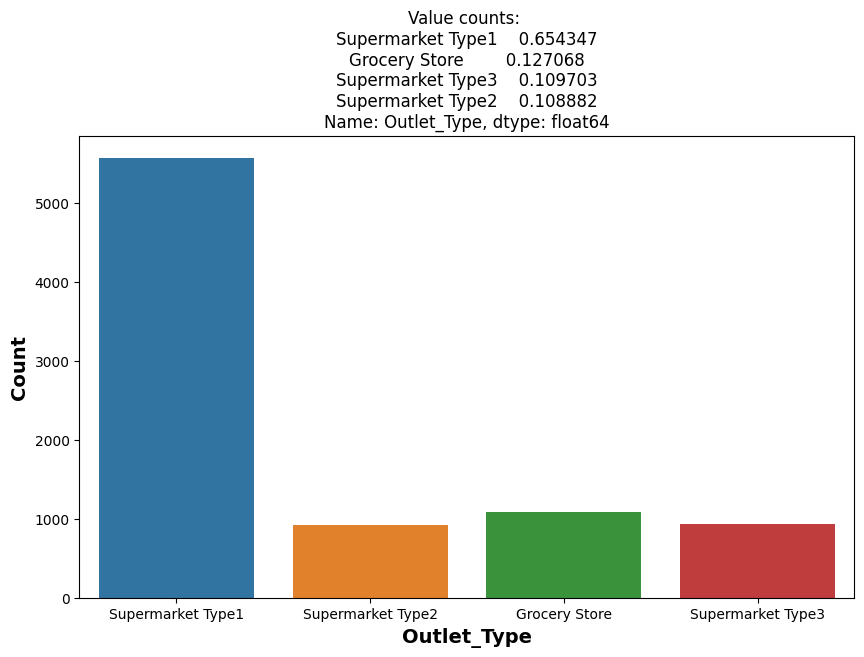

In [ ]:
UVA_Categorical(ml_train, 'Outlet_Location_Type')
UVA_Categorical(ml_train, 'Outlet_Type')

In [ ]:
ml_train['source'] = 'Train'
ml_test['source'] = 'Test'
df=pd.concat([ml_train,ml_test], ignore_index=True)

In [ ]:
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<Axes: >

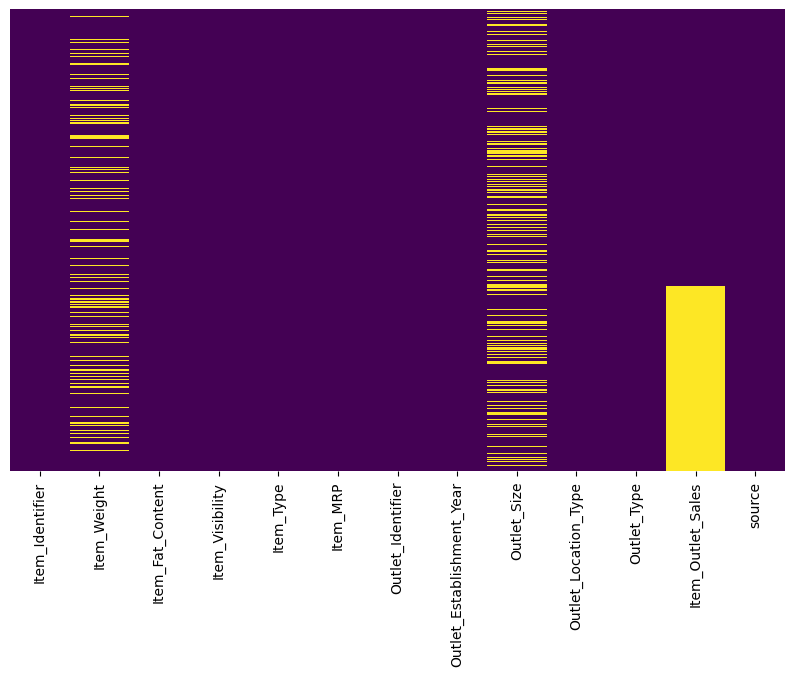

In [ ]:
plot.figure(figsize = (10,6))
sns.heatmap(df.isnull(), yticklabels=False,cbar = False,cmap ='viridis')

In [ ]:
def missing_percent():
  miss_item_weight = (df['Item_Weight'].isnull().sum()/len(df))*100
  miss_Outlet_Size = (df['Outlet_Size'].isnull().sum()/len(df))*100

  print('% of missing values in Item_Weight: ' + str(miss_item_weight))
  print('% of missing values in Outlet_Size: ' +str(miss_Outlet_Size))

missing_percent()

% of missing values in Item_Weight: 17.17121937482399
% of missing values in Outlet_Size: 28.273725711067303


In [ ]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [ ]:
df['Outlet_Size'].value_counts()


Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Size'].fillna('Medium', inplace=True)
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
df.Item_Visibility.value_counts

<bound method IndexOpsMixin.value_counts of 0        0.016047
1        0.019278
2        0.016760
3        0.000000
4        0.000000
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.000000
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64>

In [ ]:
df['Item_Visibility'].replace(0.0,value=np.nan,inplace=True)


In [ ]:
df['Item_Visibility']=df['Item_Visibility'].fillna(df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

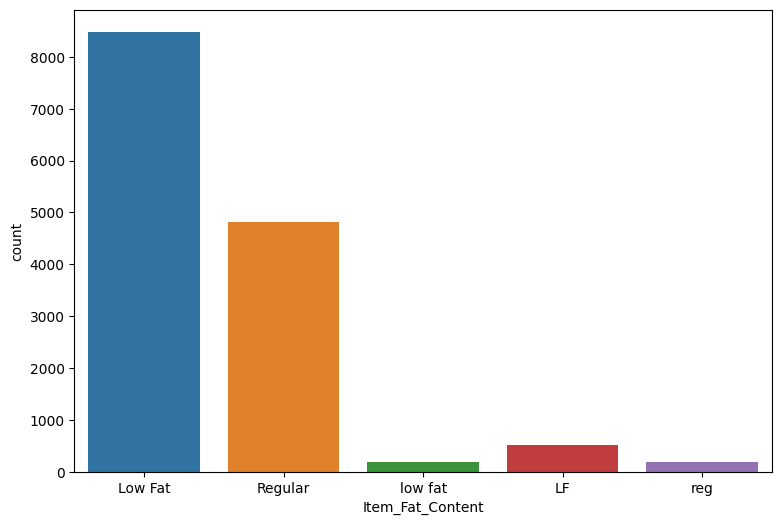

In [ ]:
plot.figure(figsize=(9, 6))
sns.countplot(x='Item_Fat_Content', data=df)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

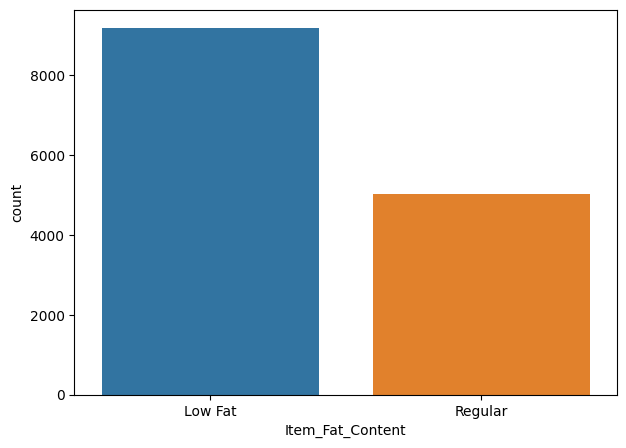

In [ ]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)
plot.figure(figsize=(7,5))
sns.countplot(x='Item_Fat_Content',data=df)

In [ ]:
test_pred = df.loc[df['source'] == 'Test']
test_pred.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
test_pred.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
8527,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
from sklearn.preprocessing import LabelEncoder
categ = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,Train
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,Train
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,Train
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,3,2,0,732.3800,Train
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,Train


In [ ]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,Train
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228,Train
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700,Train
3,19.20,1,0.000000,6,182.0950,1998,3,2,0,732.3800,Train
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052,Train


In [ ]:
train = df.loc[df['source'] == 'Train']
test = df.loc[df['source'] == 'Test']
train.drop(['source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,3,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [ ]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8523,20.750,0,0.007565,13,107.8622,1999,1,0,1
8524,8.300,1,0.038428,4,87.3198,2007,3,1,1
8525,14.600,0,0.099575,11,241.7538,1998,3,2,0
8526,7.315,0,0.015388,13,155.0340,2007,3,1,1
8527,NaN,1,0.118599,4,234.2300,1985,1,2,3


In [ ]:
x = train.drop(columns="Item_Outlet_Sales")
y = train["Item_Outlet_Sales"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = 0)
# create empty set to store accuracies of all modes and later use for comparison
model_comparison = {}



In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred

array([2243.48985599, 2602.45920272, 1911.24717495, ..., 3643.98361059,
       -206.01279048, 5464.07860868])

In [ ]:
model_comparison['Linear Regression'] = [lr.score(X_train,y_train)*100,r2_score(y_test,y_pred)*100]

print("Linear Regression\n\nAccuracy: {}%".format(round(lr.score(X_train,y_train)*100)))
print("r2 score: {}%".format(round(r2_score(y_test,y_pred)*100)))

Linear Regression

Accuracy: 50%
r2 score: 59%


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
y_pred

array([2590.56683837, 1323.59774503, 2121.4662755 , ..., 3977.36956056,
        195.94168462, 5711.45906686])

In [ ]:
model_comparison['Random Forest'] = [rf.score(X_train,y_train)*100,r2_score(y_test,y_pred)*100]

print("Random Forest\n\nAccuracy: {}%".format(round(rf.score(X_train,y_train)*100)))
print("r2 score: {}%".format(round(r2_score(y_test,y_pred)*100)))

Random Forest

Accuracy: 61%
r2 score: 59%


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 100, learning_rate=0.05)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred

array([2631.1797 , 1684.1154 , 2261.688  , ..., 4293.247  ,  207.70308,
       6022.171  ], dtype=float32)

In [ ]:
model_comparison['XGBoost Regressor'] = [xgb.score(X_train,y_train)*100,r2_score(y_test,y_pred)*100]

print("XGBoost Regressor\n\nAccuracy: {}%".format(round(xgb.score(X_train,y_train)*100)))
print("r2 score: {}%".format(round(r2_score(y_test,y_pred)*100)))

XGBoost Regressor

Accuracy: 68%
r2 score: 58%


In [ ]:

model_comparison_df = pd.DataFrame.from_dict(model_comparison).T
model_comparison_df.columns = ['Accuracy', "r2_score"]
model_comparison_df = model_comparison_df.sort_values('Accuracy', ascending=True)
model_comparison_df.style.background_gradient(cmap='Blues')

,Accuracy,r2_score
Random Forest,60.824692,59.071144
XGBoost Regressor,68.359423,58.486115


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = go.Figure(data=[
    go.Bar(name='r2_score', y=model_comparison_df.index, x=model_comparison_df['r2_score'], orientation='h', marker_color='#7baaf7'),
    go.Bar(name='Accuracy', y=model_comparison_df.index, x=model_comparison_df['Accuracy'], orientation='h', marker_color='#4285f4')
])
fig.update_layout(barmode='group')
fig.show()

In [ ]:

test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8523,20.750,0,0.007565,13,107.8622,1999,1,0,1
8524,8.300,1,0.038428,4,87.3198,2007,3,1,1
8525,14.600,0,0.099575,11,241.7538,1998,3,2,0
8526,7.315,0,0.015388,13,155.0340,2007,3,1,1
8527,NaN,1,0.118599,4,234.2300,1985,1,2,3


In [ ]:
pred = xgb.predict(test)
pred



array([1545.0731, 1357.6664,  705.163 , ..., 1844.6306, 3960.4448,
       1344.2488], dtype=float32)

In [ ]:
test_pred.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
8527,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test_pred["Predicted_Item_Outlet_Sale"] = pred
test_pred

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_Item_Outlet_Sale
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1545.073120
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1357.666382
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,705.163025
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2373.882324
8527,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6150.528809
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2212.186523
14200,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2517.733154
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1844.630615
14202,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3960.444824


In [ ]:
test_pred.to_csv("submit.csv",index=False)

In [ ]:
ls=[]
for i in test.columns:
    s = float(input(f"Enter the {i}:"))
    ls.append(s)

Enter the Item_Weight:55
Enter the Item_Fat_Content:55
Enter the Item_Visibility:22
Enter the Item_Type:55
Enter the Item_MRP:22
Enter the Outlet_Establishment_Year:55
Enter the Outlet_Size:5
Enter the Outlet_Location_Type:55
Enter the Outlet_Type:55


In [ ]:
xgb.predict(np.array(ls).reshape(1,-1))

array([1150.3258], dtype=float32)

In [ ]:
ls1=[]
for i in test.columns:
    s = float(input(f"Enter the {i}:"))
    ls1.append(s)

Enter the Item_Weight:55
Enter the Item_Fat_Content:55
Enter the Item_Visibility:22
Enter the Item_Type:55
Enter the Item_MRP:22
Enter the Outlet_Establishment_Year:55
Enter the Outlet_Size:5
Enter the Outlet_Location_Type:55
Enter the Outlet_Type:55


In [ ]:
xgb.predict(np.array(ls1).reshape(1,-1))

array([1150.3258], dtype=float32)

In [ ]:
import joblib
import pickle

joblib.dump(xgb,"supermarket_model.sav")

['supermarket_model.sav']